In [1]:
# Import the general functions for metabolic modelling
%run 'general_functions.ipynb'


--------------------------------------------
--------------------------------------------

Using license file /home/users/hherrmann/gurobi.lic
Academic license - for non-commercial use only


In [2]:
# Load the 4 model instances: OxR resistant and sensitive, and
# RuR resistant and sensitive 
model_wt = cobra.io.read_sbml_model("../Models/Colon_Combined_exo_woBile_WT.xml")
model_oxr = cobra.io.read_sbml_model("../Models/Colon_Combined_exo_woBile_OxR.xml")
model_dmso = cobra.io.read_sbml_model("../Models/Colon_Combined_exo_woBile_WT+DMSO.xml")
model_rur = cobra.io.read_sbml_model("../Models/Colon_Combined_exo_woBile_RuR+DMSO.xml")

In [3]:
models = [model_wt,model_oxr,model_dmso,model_rur]
conditions = ["WT","OxR","WT-DMSO","RuR"]

In [4]:
# Reactions of interest 
o2 = "HMR_9048"
bm = "HCC_biomass"
atpase = "HMR_6916"
lac = "HMR_9135"
fatty_acid_rxns = [r.id for r in model_wt.reactions if "FAx" in r.id]
rxns_of_interest = [o2,atpase,lac,bm] + fatty_acid_rxns

# Do pFBA and FVA for the reactions of interest 

pfba_wt = cobra.flux_analysis.pfba(model_wt,reactions=rxns_of_interest)
pfba_oxr = cobra.flux_analysis.pfba(model_oxr,reactions=rxns_of_interest)
pfba_dmso = cobra.flux_analysis.pfba(model_dmso,reactions=rxns_of_interest)
pfba_rur = cobra.flux_analysis.pfba(model_rur,reactions=rxns_of_interest)
pfbas = [pfba_wt,pfba_oxr,pfba_dmso,pfba_rur]

fva_wt = flux_variability_analysis(model_wt,rxns_of_interest)
fva_oxr = flux_variability_analysis(model_oxr,rxns_of_interest)
fva_dmso = flux_variability_analysis(model_dmso,rxns_of_interest)
fva_rur = flux_variability_analysis(model_rur,rxns_of_interest)
fvas = [fva_wt,fva_oxr,fva_dmso,fva_rur]

In [5]:
# O2_req = [float(pfba[o2]) for pfba in pfbas]
# ATP_req = [float(pfba[atpase]) for pfba in pfbas]
# lac_sec = [abs(float(pfba[lac])) for pfba in pfbas]
# FA_req = [sum(pfba_wt[fatty_acid_rxns]) for pfba in pfbas]

# Growth-normalize the results 
O2_req = [float(pfba[o2]/pfba[bm]) for pfba in pfbas]
ATP_req = [float(pfba[atpase]/pfba[bm]) for pfba in pfbas]
lac_sec = [abs(float(pfba[lac]/pfba[bm])) for pfba in pfbas]
FA_req = [sum(pfba_wt[fatty_acid_rxns])/float(pfba[bm]) for pfba in pfbas]

/home/users/hherrmann/envs/guropy/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/home/users/hherrmann/envs/guropy/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/users/hherrmann/envs/guropy/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/users/hherrmann/envs/guropy/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


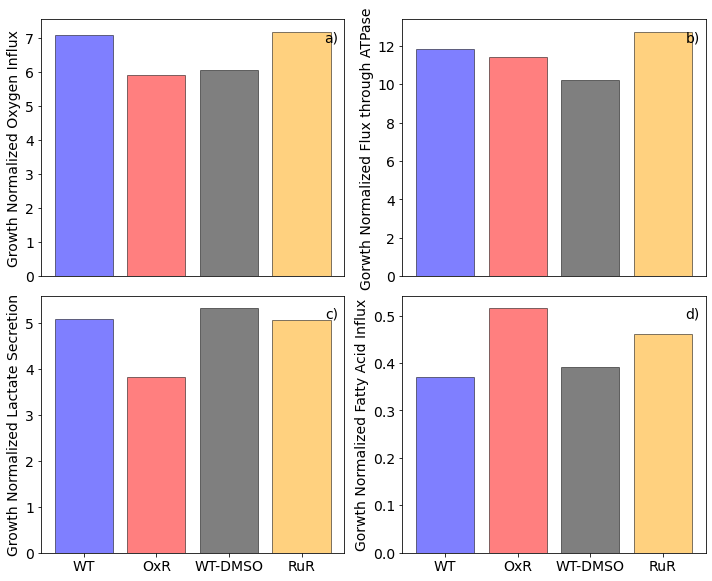

In [6]:
# Visualize the results 
fs = 14
matplotlib.rc('xtick', labelsize=fs) 
matplotlib.rc('ytick', labelsize=fs) 
names = ["WT","OxR","WT-DMSO","RuR"]
cols = ["blue","red","black","orange"]

fig, axs = plt.subplots(2,2,figsize=(10,8))
fade = 0.5

axs[0, 0].bar(names,O2_req,color=cols,alpha=fade,edgecolor='black')
axs[0, 0].set_xticklabels(names,fontsize=fs)
axs[0, 0].set_ylabel("Growth Normalized Oxygen Influx",fontsize=fs)
axs[0, 0].set_xticks([])
axs[0, 0].text(0.98,0.9,"a)", fontsize=fs, verticalalignment='bottom', horizontalalignment='right',transform=axs[0, 0].transAxes)

axs[0, 1].bar(names,ATP_req,color=cols,alpha=fade,edgecolor='black')
axs[0, 1].set_xticklabels(names,fontsize=fs)
axs[0, 1].set_ylabel("Gorwth Normalized Flux through ATPase",fontsize=fs)
axs[0, 1].set_xticks([])
axs[0, 1].text(0.98,0.9,"b)", fontsize=fs, verticalalignment='bottom', horizontalalignment='right',transform=axs[0, 1].transAxes)

axs[1, 0].bar(names,lac_sec,color=cols,alpha=fade,edgecolor='black')
axs[1, 0].set_xticklabels(names,fontsize=fs)
axs[1, 0].set_ylabel("Growth Normalized Lactate Secretion",fontsize=fs)
axs[1, 0].text(0.98,0.9,"c)", fontsize=fs, verticalalignment='bottom', horizontalalignment='right',transform=axs[1, 0].transAxes)

axs[1, 1].bar(names,FA_req,color=cols,alpha=fade,edgecolor='black')
axs[1, 1].set_xticklabels(names,fontsize=fs)
axs[1, 1].set_ylabel("Gorwth Normalized Fatty Acid Influx",fontsize=fs)
axs[1, 1].text(0.98,0.9,"d)", fontsize=fs, verticalalignment='bottom', horizontalalignment='right',transform=axs[1, 1].transAxes)

plt.tight_layout()
plt.savefig("../Figures/Hypoxia/Seahorse_Rxns.svg")
plt.show()
plt.close()